In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt



In [47]:
# Charger les données
data = pd.read_csv('Bks.csv')
orders = pd.read_csv('Orders.csv')

In [48]:
# Fusionner les données
merged_data = pd.merge(orders, data, on='ISBN')

In [49]:
# Séparer les features et la target
X = merged_data[['QUANTITY', 'PRICE', 'QUANTITY_AVAILABLE']]
y = merged_data['TOTAL_PRICE']

In [50]:
# Normaliser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
# Construire le modèle
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [53]:
# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
3/3 [==============================] - 1s 96ms/step - loss: 4065.1589 - val_loss: 3008.2786
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 4049.3933 - val_loss: 2993.8289
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 4033.6985 - val_loss: 2978.7004
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 4016.8020 - val_loss: 2962.9700
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 3999.5784 - val_loss: 2946.4368
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 3981.6787 - val_loss: 2929.0378
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 3962.6960 - val_loss: 2910.6340
Epoch 8/50
3/3 [==============================] - 0s 22ms/step - loss: 3943.4055 - val_loss: 2891.4495
Epoch 9/50
3/3 [==============================] - 0s 22ms/step - loss: 3922.1477 - val_loss: 2871.3711
Epoch 10/50
3/3 [==============================] - 0s 23ms/step - loss: 3

In [55]:
# Évaluer le modèle
loss = model.evaluate(X_test, y_test)
print("Loss (Mean Squared Error):", loss)


1/1 [==============================] - 0s 31ms/step - loss: 1084.1134
Loss (Mean Squared Error): 1084.1134033203125


In [56]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 74ms/step


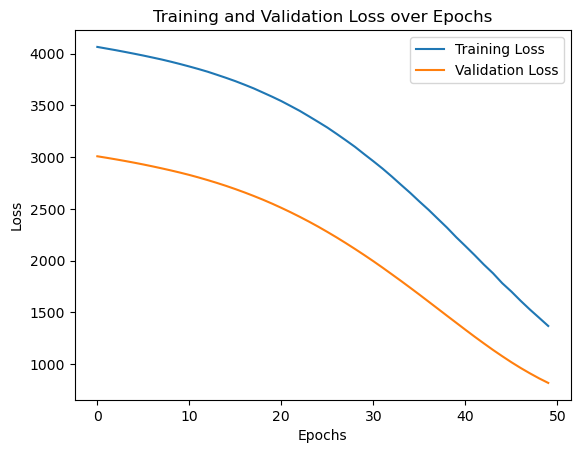

In [57]:
# Visualisation de l'erreur au fil des époques
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

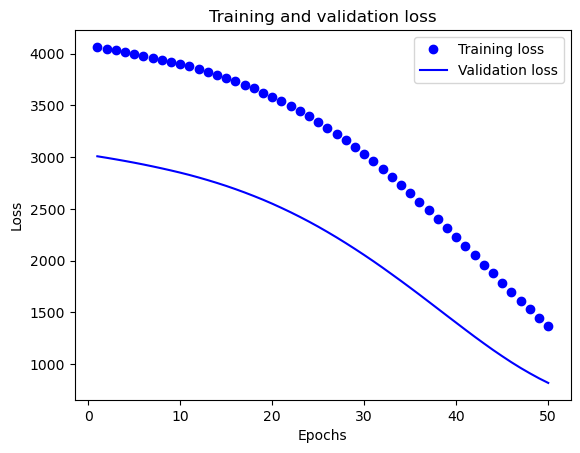

In [58]:
import matplotlib.pyplot as plt

# Extraire la perte (loss) sur les ensembles d'entraînement et de validation
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Créer un graphique linéaire
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Afficher le graphique
plt.show()

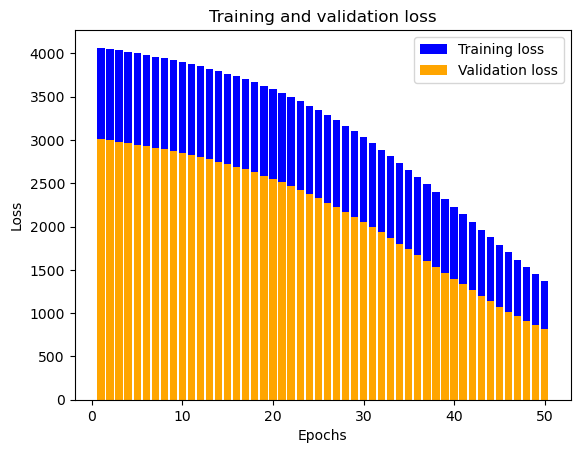

In [59]:
import matplotlib.pyplot as plt

# Extraire la perte (loss) sur les ensembles d'entraînement et de validation
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Créer un graphique en barres empilées
epochs = range(1, len(training_loss) + 1)
plt.bar(epochs, training_loss, color='blue', label='Training loss')
plt.bar(epochs, validation_loss, color='orange', label='Validation loss')

# Ajouter des étiquettes et un titre
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

# Afficher le graphique
plt.show()


In [60]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 31ms/step


In [61]:
# Temps (par exemple, mois)
temps = range(1, len(y_pred) + 1)

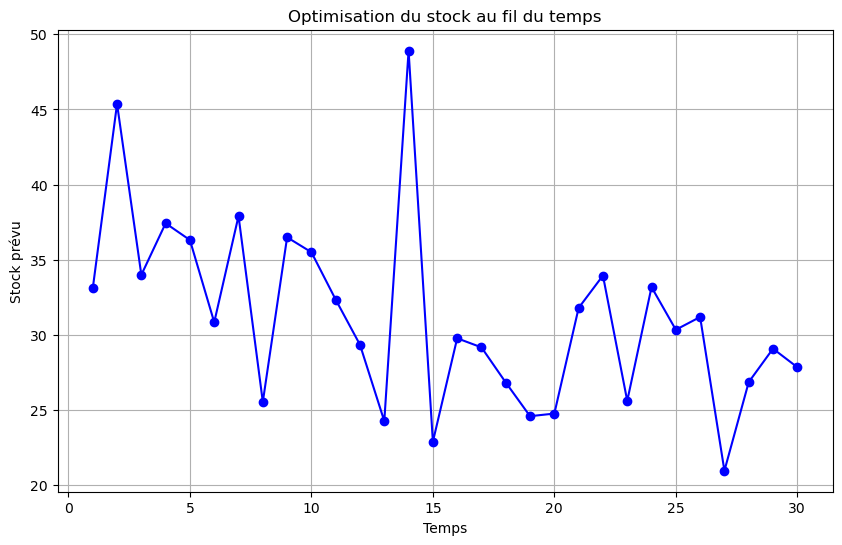

In [74]:
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(temps, y_pred, marker='o', color='b', linestyle='-')
# Ajout des titres et des labels
plt.title("Optimisation du stock au fil du temps")
plt.xlabel("Temps")
plt.ylabel("Stock prévu")
# Afficher la grille
plt.grid(True)
plt.show()